In [16]:
import math
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [4]:
def calc_intercept(method1, method2, gradient):
    """Calculate intercept given points and a gradient."""
    temp = []
    for i in range(len(method1)):
        temp.append(method2[i] - gradient * method1[i])
    return np.median(temp)


In [18]:
method1 = np.random.rand(100)
method2 = np.random.rand(100)
n_points = len(method1)
# sv is a list of the gradients between of each pair of points
sv = []
# k is the number of gradients less than -1
k = 0
for i in tqdm(range(n_points - 1)):
    for j in range(i + 1, n_points):
        dy = method2[j] - method2[i]
        dx = method1[j] - method1[i]
        # Ignore gradients that are vertical (ie the x values of the points
        # are the same)
        if dx != 0:
            gradient = dy / dx
        elif dy < 0:
            gradient = -1.e+23
        elif dy > 0:
            gradient = 1.e+23
        else:
            gradient = None
        if gradient is not None:
            sv.append(gradient)
            k += (gradient < -1)
# Sort the gradients into ascending order
sv.sort()

100%|██████████| 99/99 [00:00<00:00, 3439.89it/s]


In [19]:
#
# Find the estimated gradient and confidence limits
#
m0 = (len(sv) - 1) / 2
if m0 == int(m0):
    # If odd
    gradient_est = sv[k + int(m0)]
else:
    # If even
    gradient_est = 0.5 * (sv[k + int(m0 - 0.5)] + sv[k + int(m0 + 0.5)])
# Calculate the index of the upper and lower confidence bounds
w = 1.96
ci = w * math.sqrt((n_points * (n_points - 1) * (2 * n_points + 5)) / 18)
n_gradients = len(sv)
m1 = int(round((n_gradients - ci) / 2))
m2 = n_gradients - m1 - 1
# Calculate the lower and upper bounds of the gradient
(gradient_lb, gradient_ub) = (sv[k + m1], sv[k + m2])

In [20]:
# Calculate the intercept as the median of all the intercepts of all the
# lines connecting each pair of points
int_est = calc_intercept(method1, method2, gradient_est)
int_ub = calc_intercept(method1, method2, gradient_lb)
int_lb = calc_intercept(method1, method2, gradient_ub)

In [21]:
print(f'Gradient = {gradient_est:4.2f} ({gradient_ub:4.2f} - {gradient_lb:4.2f})')
print(f'Y-intercept = {int_est:4.2f} ({int_ub:4.2f} - {int_lb:4.2f})')

Gradient = 1.04 (1.48 - 0.75)
Y-intercept = -0.01 (0.13 - -0.23)


In [22]:
print(gradient_est)

1.0427778853878764


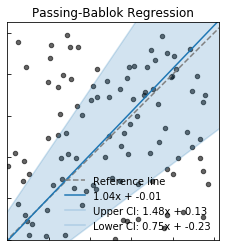

In [24]:
ax = plt.axes()
ax.set_title('Passing-Bablok Regression')
ax.set_xlabel('Method 1')
ax.set_ylabel('Method 2')
# Scatter plot
ax.scatter(method1, method2, c='k', s=20, alpha=0.6, marker='o')
# Get axis limits
left, right = plt.xlim()
bottom, top = plt.ylim()
# Change axis limits
ax.set_xlim(0, right)
ax.set_ylim(0, top)
# Reference line
label = 'Reference line'
ax.plot([left, right], [left, right], c='grey', ls='--', label=label)
# Passing-Bablok regression line
x = np.array([left, right])
y = gradient_est * x + int_est
ax.plot(x, y, label=f'{gradient_est:4.2f}x + {int_est:4.2f}')
# Passing-Bablok regression line - confidence intervals
x = np.array([left, right])
y_lb = gradient_lb * x + int_lb
y_ub = gradient_ub * x + int_ub
label = f'Upper CI: {gradient_ub:4.2f}x + {int_ub:4.2f}'
ax.plot(x, y_ub, c='tab:blue', alpha=0.2, label=label)
label = f'Lower CI: {gradient_lb:4.2f}x + {int_lb:4.2f}'
ax.plot(x, y_lb, c='tab:blue', alpha=0.2, label=label)
ax.fill_between(x, y_ub, y_lb, alpha=0.2)
# Set aspect ratio
ax.set_aspect('equal')

plt.xlabel('')
plt.ylabel('')
# Legend
ax.legend(frameon=False)
# Show
plt.tick_params(axis='both', which='both', direction='in', bottom=True,
                top=False, left=True, right=False, labelbottom=False, labelleft=False)
# plt.savefig("PBR.eps", dpi=600, bbox_inches='tight', pad_inches=0)